#  Dominant Colour study using (Scipy, Sklearn)- K Means and Sklearn -GMM

# Dominant Colour Dist using Scipy Lib

In [232]:
from PIL import Image

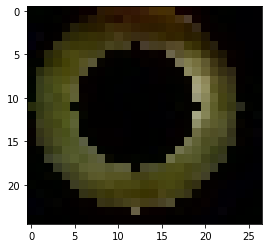

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.image as img
from scipy.cluster.vq import kmeans, vq
%matplotlib inline 
# import cv2
 
image =Image.open('/home/roopesh/Desktop/HSL/V2.0/New_Green_Eyes/Mask/Angular_Mask/image628.jpg')
 

impixels=image.convert("RGB")
imarray=np.array(impixels.getdata())

plt.imshow(image)
# plt.show()

In [234]:
# r = []
# g = []
# b = []
 
# for row in image:
#     for pixel in row:
#         # A pixel contains RGB values
#         r.append(pixel[0])
#         g.append(pixel[1])
#         b.append(pixel[2])
        
# print(r,g,b)

# d={'red':[1,2,3], 'green':[4,5,6], 'blue':[7,8,9]}
# d={'red':r, 'green':g, 'blue':b}

df = pd.DataFrame(imarray, columns=['red', 'green', 'blue'])
 
# df.to_csv('file_name.csv', encoding='utf-8')


In [235]:
df.head()

,red,green,blue
0,0,3,0
1,0,4,0
2,0,2,0
3,0,0,0
4,3,2,0


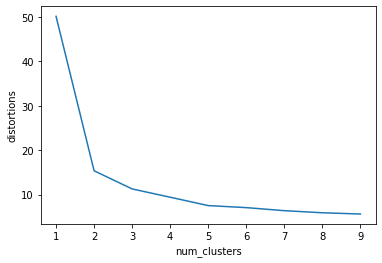

In [236]:
distortions = []
num_clusters = range(1, 10)
 
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['red','green','blue']].values.astype(float), i)
    distortions.append(distortion)
 
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
 
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [237]:
#  Best Cluster is 3 Based on the Elbow Plot

In [238]:
# resized1.columns=['red','green','blue']

In [239]:
# resized1

In [240]:
a = pd.DataFrame(df[(df['red']>= 50) | (df['green'] >= 50) | (df['blue'] >= 50)])

In [241]:
a

,red,green,blue
10,51,24,5
11,51,22,4
12,53,24,6
13,59,31,7
14,70,44,7
...,...,...,...
607,68,60,21
608,68,59,26
609,72,65,36
610,79,75,46


In [242]:
cluster_centers, _ = kmeans(a.values.astype(float), 3) # 
cluster_centers


array([[ 61.90066225,  56.49006623,  18.0397351 ],
       [134.47368421, 131.78947368,  91.63157895],
       [ 84.68181818,  84.84090909,  41.38636364]])

In [243]:
 index, _ = vq(a[['red', 'green', 'blue']].values.astype(float), cluster_centers)

In [244]:
index

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1,
       1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2,
       0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2,
       2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [245]:
_

array([36.66692695, 38.80081529, 35.77403266, 27.92907211, 18.53312649,
       19.97630938, 17.33827702, 32.31314019, 36.78449801, 35.1445448 ,
       31.18997476, 25.90226068, 11.46402186, 26.13258866, 17.51555475,
       21.04740681, 22.60208532, 31.07542559, 30.17377851, 32.31129561,
       20.48436544, 21.06376214, 17.95874473, 18.42273886, 10.0046325 ,
       10.47292105, 10.91204856, 13.08504869, 15.14389991, 14.32036326,
       23.34168788, 31.1907179 , 28.70747571,  9.81855028,  4.23012953,
       11.97043637,  9.25037797, 10.5560608 ,  3.8823709 , 18.23685109,
        8.04045787, 19.04490917, 26.79388345, 17.37033198, 13.85736072,
       14.0616632 , 11.33992982,  9.22744014, 19.78778026, 17.6856273 ,
       13.42454838, 20.32810233, 13.93480406, 11.19395336, 15.89556008,
       43.88003035,  6.81598449,  8.91899959, 12.44272   ,  8.58228322,
       16.72409401, 15.60055895, 21.17383012,  7.11294652, 12.44454642,
       23.13767059, 16.18264862, 39.25603152, 11.73585838,  4.67

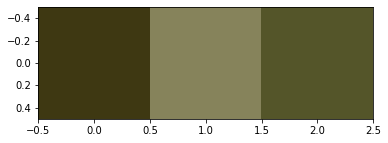

In [223]:
plt.imshow(cluster_centers.reshape(1,3,3)/255.) # 1*3 matrix with 3 clusters 


In [224]:
a['scipy_clusters'] = vq(a, cluster_centers)[0]

In [225]:
df0= a.groupby(a['scipy_clusters'])

In [226]:
df0.count()

,red,green,blue
scipy_clusters,,,
0,153,153,153
1,18,18,18
2,87,87,87


In [227]:
print('cluster-1',df0['red'].max()/(df0['red'].sum())*100)


cluster-1 scipy_clusters
0    0.800759
1    6.783817
2    1.469795
Name: red, dtype: float64


In [246]:
def rgb_to_hsv(r, g, b):
    '''
    Convert RGB to HSV
    returns h,s,v
    '''

    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v

idx, _ = vq(df[['red', 'green', 'blue']].values.astype(float), cluster_centers)
print(idx)
count = np.bincount(idx)
sum = np.sum(count)
i, Blue, Green, Brown = 0, 0, 0, 0
for row in cluster_centers:
    r = row[0]
    g = row[1]
    b = row[2]
    h, s, v = rgb_to_hsv(r, g, b)               # calling the function to convert RGB to HSV
    percent = count[i]*100/sum
    if h >= 170 and h < 290:
        Blue += percent
    elif h >= 60 and h < 170:
        Green += percent
    else:
        Brown += percent
    i+=1
print("Blue = " + str(int(Blue))+"%" '\n' "Green = " + str(int(Green))+"%" '\n' "Brown = " + str(int(Brown))+"%")


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 1 1 1 2 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 2 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 2 2 2 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0
 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 1 2 2 2 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 1 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 

In [230]:
data= [[Blue, Green, Brown]]
colou_= pd.DataFrame(data, columns=['Blue_%', 'Green_%', 'Brown_%'])

In [231]:
colou_

,Blue_%,Green_%,Brown_%
0,0,12.888889,87.111111


In [1481]:
#  Most Dominant colour is Blue, Green -> since Black is in image its obvious 

#  BUT WE WANT OUR RESULTS TO BE BLUE 

In [1482]:
#  when cluster = 2

In [1483]:
cluster_centers, _ = kmeans(df.values.astype(float), 3) # 
cluster_centers


array([[   5.43674177,   -4.47487002,    1.01213172],
       [  58.05633803,  105.13380282, -113.83802817],
       [  42.43333333,   76.98888889,  107.03888889]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


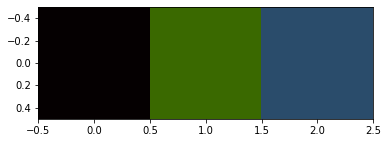

In [1484]:
plt.imshow(cluster_centers.reshape(1,3,3)/255.) # 1*3 matrix with 4 clusters 

In [1485]:
cluster_centers

array([[   5.43674177,   -4.47487002,    1.01213172],
       [  58.05633803,  105.13380282, -113.83802817],
       [  42.43333333,   76.98888889,  107.03888889]])

In [1486]:
#  Most Dominant colour is Green AND Black -> since Black is in image its obvious, lets check with removing BLACK 

#  then we should not get this BLACK 

#  EXPECTING blue and green after removing black in cluster =2

In [1487]:
# Assign cluster labels
df['clusters'] = vq(df, cluster_centers)[0]


In [1488]:
df1= df.groupby(['clusters'])

In [1489]:
df1.count()

,red,green,blue
clusters,,,
0,577,577,577
1,142,142,142
2,180,180,180


# Trial-2 Removing black pixels as our image has no white BG

In [1490]:
remove1=pd.DataFrame(df)

In [1491]:
remove1 = pd.DataFrame({'red':r, 'green':g, 'blue':b})

In [1492]:
# Dropping Pixels <=50 to avoid black

In [1493]:
# for row in df.columns:  # Loop through columns
#   if len(df[row].unique()) == 1:  # Find unique values in column along with their length and if len is == 1 then it contains same values
#     df.drop([row], axis=1, inplace=True)  # Drop the column

In [1494]:
# remove1.drop(remove1[remove1['red'] < 10].index, inplace = True)
# remove1.drop(remove1[remove1['green'] < 10].index, inplace = True)
# remove1.drop(remove1[remove1['blue'] < 10].index, inplace = True)                 

In [1495]:
a = pd.DataFrame(remove1[(remove1['red']>= 50) | (remove1['green'] >= 50) | (remove1['blue'] >= 50)])


In [1496]:
a

,red,green,blue
16,77,103,126
42,82,105,123
43,66,94,115
44,58,89,109
45,68,95,114
...,...,...,...
854,28,44,67
855,27,49,73
856,43,65,88
857,49,68,85


In [1497]:
# Black Pixels has been Removed 

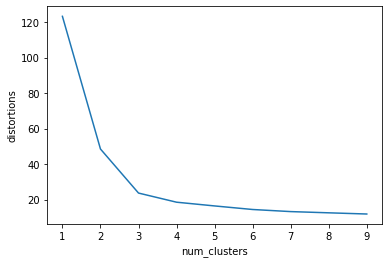

In [1498]:
distortions = []
num_clusters = range(1, 10)
 
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(a[['red','green','blue']].values.astype(float), i)
    distortions.append(distortion)
 
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
 
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [1499]:
cluster_centers, _ = kmeans(a[['red','green','blue']].values.astype(float), 3) # 
cluster_centers


array([[  58.05633803,  105.13380282, -113.83802817],
       [  41.81967213,   76.20218579,  106.19125683],
       [  98.83870968, -114.09677419,  -87.06451613]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


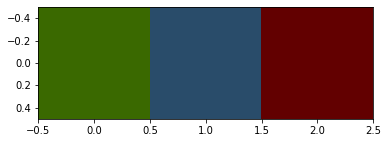

In [1500]:
plt.imshow(cluster_centers.reshape(1,3,3)/255.) # 1*3 matrix with 3 clusters 

#  changing Clusters---2 based on elbow with best cluster 

In [1501]:
cluster_centers, _ = kmeans(a[['red','green','blue']].values.astype(float), 3) # 
cluster_centers


array([[  41.81967213,   76.20218579,  106.19125683],
       [  58.05633803,  105.13380282, -113.83802817],
       [  98.83870968, -114.09677419,  -87.06451613]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


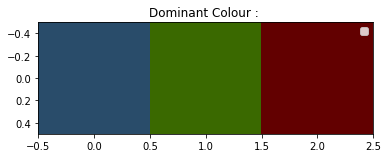

In [1502]:
plt.title("Dominant Colour : ")
plt.legend()
plt.imshow(cluster_centers.reshape(1,3,3)/255.) # 1*3 matrix with 3 clusters 

#  Expected Results we have got --BLUE 

In [1503]:
a['scipy_clusters'] = vq(a, cluster_centers)[0]

In [1504]:
# df0= a.groupby(['scipy_clusters'])

In [1505]:
df0= a.groupby(a['scipy_clusters'])

In [1506]:
df0.count()

,red,green,blue
scipy_clusters,,,
0,183,183,183
1,142,142,142
2,31,31,31


In [1507]:
df=pd.DataFrame(df0.count())

In [1508]:
df

,red,green,blue
scipy_clusters,,,
0,183,183,183
1,142,142,142
2,31,31,31


In [1509]:
print('cluster-1',df['red'].max()/(df['red'].sum())*100)


cluster-1 51.40449438202247


In [1510]:
# print('cluster-3',df(['red'][1]).max()/(df['blue'][1].sum())*100)


# Trial-3  Based on Sklearn Library -Kmeans

In [1511]:
from sklearn. cluster import KMeans

In [1512]:
X= a[['red','green','blue']]

In [1513]:
SK_learn= pd.DataFrame(X)

In [1514]:
kmeans1 = KMeans(n_clusters=3, random_state=0).fit(SK_learn)

In [1515]:
kmeans1

KMeans(n_clusters=3, random_state=0)

In [1516]:
kmeans1.cluster_centers_

array([[  98.83870968, -114.09677419,  -87.06451613],
       [  41.81967213,   76.20218579,  106.19125683],
       [  58.05633803,  105.13380282, -113.83802817]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


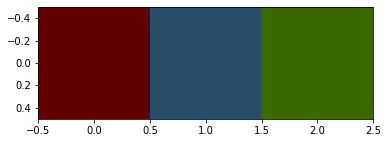

In [1517]:
plt.imshow(kmeans1.cluster_centers_.reshape(1,3,3)/255.)

In [1518]:
kmeans1.labels_

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1,
       2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1,
       2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,

In [1519]:
SK_learn['sk_clusters_label'] = pd.Series(kmeans1.labels_, index=SK_learn.index)

In [1520]:
SK_learn.max()

red                  127
green                127
blue                 127
sk_clusters_label      2
dtype: int32

In [1521]:
df= SK_learn.groupby(['sk_clusters_label'])

In [1522]:
df.count()

,red,green,blue
sk_clusters_label,,,
0,31,31,31
1,183,183,183
2,142,142,142


sk_clusters_label
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

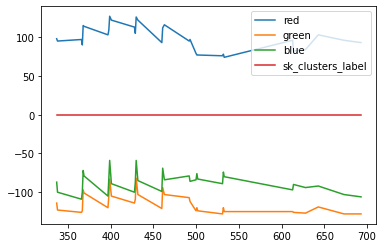

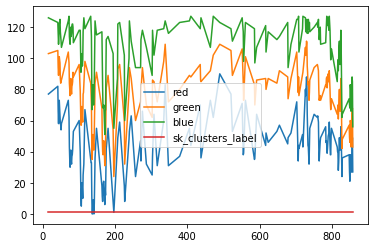

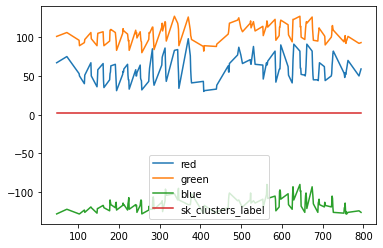

In [1523]:
df.plot()

# Trial-4 Based on Sklearn - Gaussian Mixture Model (GMM)

In [1524]:
from sklearn.mixture import GaussianMixture

In [1525]:
X1= a[['red','green','blue']]

In [1526]:
# Tuned Gmm

gm=GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=250,
means_init=None, n_components=3, n_init=10, precisions_init=None,
random_state=60, reg_covar=1e-06, tol=0.001, verbose=0,
verbose_interval=10, warm_start=False, weights_init=None).fit(X1)

In [1527]:
gm.predict(X1)

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1,
       2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1,
       2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,

In [1528]:
gm.means_

array([[  98.83870968, -114.09677419,  -87.06451613],
       [  41.81967213,   76.20218579,  106.19125683],
       [  58.05633803,  105.13380282, -113.83802817]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


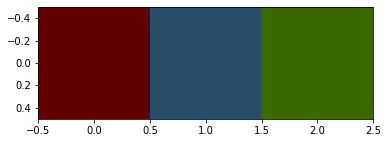

In [1529]:
plt.imshow(gm.means_.reshape(1,3,3)/255.)

In [1530]:
X1['gmm_clusters_label'] = pd.Series(gm.predict(X1), index=X1.index)


In [1531]:
# remove1.drop('scipy_clusters',1)
# remove1.drop('sk_clusters_label',1)


In [1532]:
X1

,red,green,blue,gmm_clusters_label
16,77,103,126,1
42,82,105,123,1
43,66,94,115,1
44,58,89,109,1
45,68,95,114,1
...,...,...,...,...
854,28,44,67,1
855,27,49,73,1
856,43,65,88,1
857,49,68,85,1


In [1533]:
X1= X1.groupby(['gmm_clusters_label'])

In [1534]:
X1.count()

,red,green,blue
gmm_clusters_label,,,
0,31,31,31
1,183,183,183
2,142,142,142
